In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [190]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Basic information

In [191]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [192]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [193]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [194]:
data['Pclass'].value_counts() # Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [195]:
data['Survived'].value_counts() # 0 = not survived, 1 = survived

Survived
0    549
1    342
Name: count, dtype: int64

#### Basic Visualization

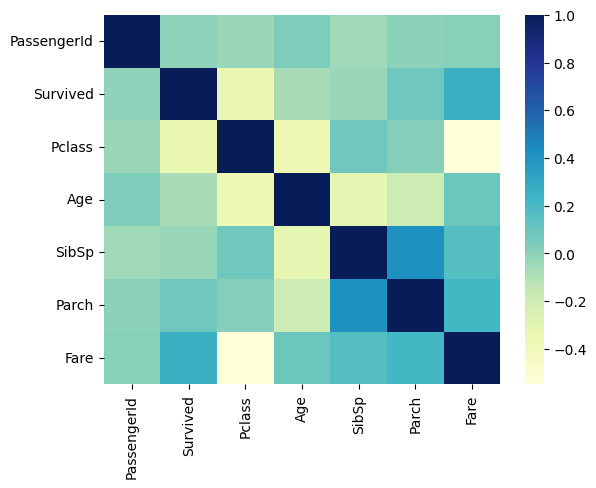

In [196]:
sns.heatmap(data.corr(numeric_only=True), cmap="YlGnBu")
plt.show()
# The result initially shows that the 'Survived' value is related to 'Pclass', 'Age', 'Fare', etc. 

#### Split the training data into training and testing subset

##### Learned the idea of splitting existing training data into subsets of training and testing data, inspired by: https://youtu.be/fATVVQfFyU0?si=vQ15unS58Pu-HI-_

In [197]:
# This section of code was inspired by above video
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(data, data[["Survived", "Pclass", "Sex"]]): # Want some attributes to be equally distributed
    train_set = data.loc[train_indices]
    test_set = data.loc[test_indices]

### Process Data
- Cleaning data
- Deal with missing values

In [198]:
train_set.info() # The result shows we're missing values in 'Age', 'Cabin', and 'Embarked'

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 42 to 405
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          571 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        163 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [199]:
train_set['Age'].fillna(train_set['Age'].median(), inplace=True) # fill null 'Age' with median value
train_set.isnull().sum() # check no missing value for 'Age' column

/var/folders/b9/fqrwtf1d55gdfjqsw56545k00000gn/T/ipykernel_15084/2553835957.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_set['Age'].fillna(train_set['Age'].median(), inplace=True) # fill null 'Age' with median value


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          549
Embarked         2
dtype: int64

In [200]:
train_set[pd.isnull(train_set.Embarked)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN


In [201]:
train_set.dropna(subset=['Embarked'], inplace=True) # delete missing rows since only 2 rows missing 'Embarked' value
train_set[pd.isnull(train_set.Embarked)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [202]:
train_set[pd.isnull(train_set.Cabin)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
42,43,0,3,"Kraeff, Mr. Theodor",male,28.0,0,0,349253,7.8958,NaN,C
780,781,1,3,"Ayoub, Miss. Banoura",female,13.0,0,0,2687,7.2292,NaN,C
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
726,727,1,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,3,0,31027,21.0000,NaN,S
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
176,177,0,3,"Lefebre, Master. Henry Forbes",male,28.0,3,1,4133,25.4667,NaN,S
762,763,1,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,NaN,C
423,424,0,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S


In [203]:
train_set.drop(columns=['Cabin'], inplace=True) # delete whole column of 'Cabin' since most of the values are missing and not related to the model
train_set.head() # Check if 'Cabin' column is dropped

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
42,43,0,3,"Kraeff, Mr. Theodor",male,28.0,0,0,349253,7.8958,C
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1,0,113806,53.1000,S
780,781,1,3,"Ayoub, Miss. Banoura",female,13.0,0,0,2687,7.2292,C
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,S
781,782,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,17474,57.0000,S


In [204]:
train_set.isnull().sum() # Now we cleaned the null value

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

- Modify and Process data

In [205]:
#data['Sex'] = data['Sex'].map({'male': 0, 'female':1}) 
# Separate 'Female' and 'Male' in 'Sex' into different columns
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop=None)
sex_encoded = encoder.fit_transform(train_set[['Sex']])
train_set[['Female', 'Male']] = sex_encoded

embarked_encoded = encoder.fit_transform(train_set[['Embarked']])
train_set[['C', 'Q', 'S']] = embarked_encoded
train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Female,Male,C,Q,S
42,43,0,3,"Kraeff, Mr. Theodor",male,28.0,0,0,349253,7.8958,C,0.0,1.0,1.0,0.0,0.0
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1,0,113806,53.1000,S,1.0,0.0,0.0,0.0,1.0
780,781,1,3,"Ayoub, Miss. Banoura",female,13.0,0,0,2687,7.2292,C,1.0,0.0,1.0,0.0,0.0
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,S,0.0,1.0,0.0,0.0,1.0
781,782,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,17474,57.0000,S,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,763,1,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,C,0.0,1.0,1.0,0.0,0.0
423,424,0,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,S,1.0,0.0,0.0,0.0,1.0
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,S,1.0,0.0,0.0,0.0,1.0
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,S,1.0,0.0,0.0,0.0,1.0


In [206]:
# drop the columns that are not related to the model
train_set.drop(columns=['Name', 'Sex', 'Ticket', 'Embarked'], inplace=True)

In [207]:
train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Female,Male,C,Q,S
42,43,0,3,28.0,0,0,7.8958,0.0,1.0,1.0,0.0,0.0
809,810,1,1,33.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
780,781,1,3,13.0,0,0,7.2292,1.0,0.0,1.0,0.0,0.0
33,34,0,2,66.0,0,0,10.5000,0.0,1.0,0.0,0.0,1.0
781,782,1,1,17.0,1,0,57.0000,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
762,763,1,3,20.0,0,0,7.2292,0.0,1.0,1.0,0.0,0.0
423,424,0,3,28.0,1,1,14.4000,1.0,0.0,0.0,0.0,1.0
419,420,0,3,10.0,0,2,24.1500,1.0,0.0,0.0,0.0,1.0
136,137,1,1,19.0,0,2,26.2833,1.0,0.0,0.0,0.0,1.0


#### Training Model

In [208]:
from sklearn.preprocessing import StandardScaler

X = train_set.drop(['Survived'], axis=1) # From x-axis drop survived column
Y = train_set['Survived'] # Let y-axis be the survived value, to find it's relationship/model that determines y

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
Y_data = Y.to_numpy()

In [209]:
# Using Random Forest algorithm with GridSearchCV
#  - characteristic: test all combinations, will take more time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid = {
    "n_estimators": [10, 100, 200, 500], 
    "max_depth": [None, 5, 10], 
    "min_samples_split": [2, 3, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring="accuracy", n_jobs=-1, return_train_score=True)
grid_search.fit(X_data, Y_data)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500]},
             return_train_score=True, scoring='accuracy')

In [210]:
# Try Random Forest algorithm with RandomizedSearchCV
#  - characteristic: test with custimized random combinations
from sklearn.model_selection import RandomizedSearchCV

clf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_dist = {
    "n_estimators": [int(x) for x in np.linspace(200, 1000, 10)], 
    "max_depth": [None] + list(np.linspace(5, 50, 10, dtype=int)), 
    "min_samples_split": [2, 5, 10], 
    "min_samples_leaf": [1, 2, 4, 8], 
    "max_features": ["sqrt", "log2", None], 
    "bootstrap": [True, False] 
}

rnd_search = RandomizedSearchCV(
    clf, param_distributions=param_dist,
    n_iter=60, cv=5, scoring="accuracy", random_state=42, n_jobs=-1
)
rnd_search.fit(X_data, Y_data)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, np.int64(5),
                                                      np.int64(10),
                                                      np.int64(15),
                                                      np.int64(20),
                                                      np.int64(25),
                                                      np.int64(30),
                                                      np.int64(35),
                                                      np.int64(40),
                                                      np.int64(45),
                                                      np.int64(50)],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, scoring='accuracy')

In [211]:
training_clf = grid_search.best_estimator_

In [212]:
training_clf2 = rnd_search.best_estimator_

In [213]:
# Do the same cleaning process to test_set as train_set data 
test_set['Age'].fillna(test_set['Age'].median(), inplace=True)
test_set.dropna(subset=['Embarked'], inplace=True) 
test_set.drop(columns=['Cabin'], inplace=True)
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 289 to 55
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Survived     179 non-null    int64  
 2   Pclass       179 non-null    int64  
 3   Name         179 non-null    object 
 4   Sex          179 non-null    object 
 5   Age          179 non-null    float64
 6   SibSp        179 non-null    int64  
 7   Parch        179 non-null    int64  
 8   Ticket       179 non-null    object 
 9   Fare         179 non-null    float64
 10  Embarked     179 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 16.8+ KB


/var/folders/b9/fqrwtf1d55gdfjqsw56545k00000gn/T/ipykernel_15084/855341918.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_set['Age'].fillna(test_set['Age'].median(), inplace=True)


In [214]:
def modify_data(df: pd.DataFrame) -> pd.DataFrame:
    encoder = OneHotEncoder(sparse_output=False, drop=None)
    sex_encoded = encoder.fit_transform(df[['Sex']])
    df[['Female', 'Male']] = sex_encoded

    embarked_encoded = encoder.fit_transform(df[['Embarked']])
    df[['C', 'Q', 'S']] = embarked_encoded

    df.drop(columns=['Name', 'Sex', 'Ticket', 'Embarked'], inplace=True)
    return df

In [215]:
test_set = modify_data(test_set)
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 289 to 55
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Survived     179 non-null    int64  
 2   Pclass       179 non-null    int64  
 3   Age          179 non-null    float64
 4   SibSp        179 non-null    int64  
 5   Parch        179 non-null    int64  
 6   Fare         179 non-null    float64
 7   Female       179 non-null    float64
 8   Male         179 non-null    float64
 9   C            179 non-null    float64
 10  Q            179 non-null    float64
 11  S            179 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 18.2 KB


In [216]:
# test data set
X = test_set.drop(['Survived'], axis=1)
Y = test_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
Y_data = Y.to_numpy()

In [217]:
training_clf.score(X_data, Y_data)

0.8212290502793296

In [218]:
training_clf2.score(X_data, Y_data)

0.8212290502793296

#### Based on the scores of comparison between predictions and testing data, apply the model that has higher accuracy score to the real final test data

In [219]:
final_test_data = pd.read_csv('test.csv')
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [220]:
final_test_data['Age'].fillna(final_test_data['Age'].median(), inplace=True)
final_test_data.drop(columns=['Cabin'], inplace=True)
final_test_data['Fare'].fillna(final_test_data['Fare'].median(), inplace=True)
final_test_data = modify_data(final_test_data)
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   Female       418 non-null    float64
 7   Male         418 non-null    float64
 8   C            418 non-null    float64
 9   Q            418 non-null    float64
 10  S            418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.1 KB


/var/folders/b9/fqrwtf1d55gdfjqsw56545k00000gn/T/ipykernel_15084/790143180.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_test_data['Age'].fillna(final_test_data['Age'].median(), inplace=True)
/var/folders/b9/fqrwtf1d55gdfjqsw56545k00000gn/T/ipykernel_15084/790143180.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

In [221]:

param_dist = {
    "n_estimators": [int(x) for x in np.linspace(200, 1000, 10)],
    "max_depth": [None] + list(np.linspace(5, 50, 10, dtype=int)),
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False]
}

rnd_search = RandomizedSearchCV(
    clf, param_distributions=param_dist,
    n_iter=50, cv=3, scoring="accuracy", random_state=42, n_jobs=-1
)
rnd_search.fit(X_data, Y_data)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, np.int64(5),
                                                      np.int64(10),
                                                      np.int64(15),
                                                      np.int64(20),
                                                      np.int64(25),
                                                      np.int64(30),
                                                      np.int64(35),
                                                      np.int64(40),
                                                      np.int64(45),
                                                      np.int64(50)],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, scoring='accuracy')

In [222]:
final_clf = rnd_search.best_estimator_

In [223]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill")

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

/var/folders/b9/fqrwtf1d55gdfjqsw56545k00000gn/T/ipykernel_15084/1896703401.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_final_test = X_final_test.fillna(method="ffill")


In [224]:
predictions = final_clf.predict(X_data_final_test)
final_df = pd.DataFrame(final_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv("predictions.csv", index=False)
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
